## 12. Bayesian Inference

### 12.1 Bayesian Philosophy

Postulates of **frequentist (or classical)** inference:

- Probabilty refers to limiting relative frequencies.  Probabilities are objective properties of the real world.
- Parameters are fixed, usually unknown constants.  Because they are not fluctuating, no probability statements can be made about parameters.
- Statistical procedures should be designed to have well defined long run frequency properties.  For example, a 95% confidence interval should trap the true value of the parameter with limiting frequency at least 95%.

Postulates of **Bayesian** inference:

- Probability indicates degrees of belief, not limiting frequency.  As such, we can make probability statements about lots of things, not just data which are subject to random variation.  For example, I might say that 'the probability that Albert Einstein drank a cup of tea on August 1 1948 is 35%'.  This does not refer to limiting frequency.  It reflects my strength of belief that the proposition is true.
- We can make probability statements about parameters, even though they are fixed constants.
- We can make inferences about a parameter $\theta$, by producing a probability distribution for $\theta$.  Inferences, such as point estimates and interval estimates, may then be extracted from this distribution.

### 12.2 The Bayesian Method

Bayesian inference is usually carried out in the following way:

1. Choose a probability density $f(\theta)$ -- called the **prior distribution** -- that expresses our degrees of belief about a parameter $\theta$ before we see any data.

2. We choose a statistical model $f(x | \theta)$ that reflects our beliefs about $x$ given $\theta$.

3. After observing data $X_1, \dots, X_n$, we update our beliefs and form the **posterior distribution** $f(\theta | X_1, \dots, X_n)$.

Bayesian update:

$$f(\theta | x^n) = \frac{f(x^n | \theta) f(\theta)}{\int f(x^n | \theta) f(\theta) d\theta} 
= \frac{\mathcal{L}_n(\theta) f(\theta)}{\int \mathcal{L}_n f(\theta) d\theta}
\propto \mathcal{L}_n(\theta) f(\theta)$$

We throw away the denominator, which is a constant that does not depend on $\theta$, called a **normalizing constant**.  We can summarize this by writing:

$$ \text{"posterior is proportional to likelihood times prior"} $$

We can obtain a **point estimate** using the posterior mean:

$$ \overline{\theta} = \int \theta f(\theta | x^n) d\theta = \frac{\int \theta \mathcal{L}_n(\theta) f(\theta)}{\int \mathcal{L}_n(\theta) f(\theta) d\theta}$$

We can also obtain a Bayesian interval estimate. Define $a$ and $b$ by $ \int_{-\infty}^a f(\theta | x^n) d\theta = \int_b^\infty f(\theta | x^n) d\theta = \alpha / 2$.  Let $C = (a, b)$.  Then

$$\mathbb{P}(\theta \in C | x^n) = \int_a^b f(\theta | x^n) d\theta = 1 - \alpha$$

so **$C$ is a $1 - \alpha$ posterior interval**.

When the prior and the posterior are in the same family, we say the prior is **conjugate**.

### 12.3 Functions of Parameters

The posterior CDF for $\tau = g(\theta)$ is

$$ H(\tau | x^n) = \mathbb{P}(g(\theta) \leq \tau) = \int_A f(\theta | x^n) d\theta$$

where $A = \{ \theta : g(\theta) \leq \tau \}$.  The posterior density is $h(\tau | x^n) = H'(\tau | x^n)$.

### 12.4 Simulation

The posterior can often be approximated by simulation.  Suppose we draw $\theta_1, \dots, \theta_B \sim p(\theta | x^n)$.  Then a histogram of $\theta_1, \dots, \theta_n$ approximates the posterior density $p(\theta | x^n)$.  An approximation to the posterior mean $\overline{\theta}_n = \mathbb{E}(\theta | x^n)$ is $B^{-1} \sum_{j=1}^B \theta_j$.  The posterior $1 - \alpha$ interval can be approximated by $(\theta_{\alpha/2}, \theta_{1 - \alpha/2})$ where $\theta_{\alpha/2}$ is the $\alpha/2$ sample quantile of $\theta_1, \dots, \theta_B$.

Once we have a sample $\theta_1, \dots, \theta_B$ from $f(\theta | x^n)$, let $\tau_i = g(\theta_i)$.  Then $\tau_1, \dots, \tau_B$ is a sample from $f(\tau | x^n)$.  This avoids the need to do analytical calculations.  Simulation is discussed in more detail later in the book.

### 12.5 Large Sample Properties for Bayes' Procedures

**Theorem 12.5**. Under appropriate regularity conditions, we have that the posterior is approximately $N(\hat{\theta}, \hat{\text{se}}^2)$ where $\hat{\theta}_n$ is the MLE and $\hat{\text{se}} = 1 / \sqrt{nI(\hat{\theta}_n)}$.  Hence, $\overline{\theta}_n \approx \hat{\theta}_n$.  Also, if $C_n = (\hat{\theta}_n - z_{\alpha/2} \hat{\text{se}}, \hat{\theta}_n + z_{\alpha/2} \hat{\text{se}})$ is the asymptotic frequentist $1 - \alpha$ confidence interval, then $C_n$ is also an approximate $1 - \alpha$ Bayesian posterior interval:

$$\mathbb{P}(\theta \in C_n | X^n) \rightarrow 1 - \alpha$$

There is also a **Bayesian delta method**.  Let $\tau = g(\theta)$.  Then

$$ \tau | X^n \approx N(\hat{\tau}, \overline{\text{se}}^2)$$

where $\hat{\tau} = g(\hat{\theta})$ and $\overline{\text{se}} = \text{se} | g'(\hat{\theta}) |$.

### 12.6 Flat Priors, Improper Priors and "Noninformative" Priors

**Improper priors**.  We can adopt a flat prior $f(\theta) \propto c$ where $c > 0$ is a constant.  Note that $\int f(\theta) d\theta = \infty$ so this is not a real probability density function in a proper sense. We call such prior an improper prior.  In general, improper priors are not a problem as long as the resulting posterior is a well defined probability distribution.

**Flat priors are not invariant**.  The notion of a flat prior is not well-defined because a flat prior on a parameter does not imply a flat prior ron a transformed version of a parameter.

**Jeffrey's prior**.  Take $f(\theta) \propto I(\theta)^{1/2}$ where $I(\theta)$ is the Fisher information function.  This rule turns out to be transformation invariant.

In a multiparameter problem, the Jeffrey's prior is defined to be $f(\theta) \propto \sqrt{\text{det} I(\theta)}$, where $\text{det}(A)$ denotes the determinant of a matrix $A$.

### 12.7 Multiparameter Problems

Suppose that $\theta = (\theta_1, \dots, \theta_p)$.  The posterior density is still given by

$$p(\theta | x^n) \propto \mathcal{L}(\theta) f(\theta)$$

Suppose we want to make inferences for $\theta_1$.  The marginal posterior for $\theta_1$ is

$$ f(\theta_1 | x^n) = \int \cdots \int f(\theta_1, \dots, \theta_p) d\theta_2 \dots d\theta_p$$

In practice, it might not be feasible to do this integral.  Simulation can help.  Draw randomly from the posterior:

$$\theta^1, \dots, \theta^B \sim f(\theta | x^n)$$

where the superscripts index the different draws; each $\theta^j$ is a vector $\theta^j = (\theta^j_1, \dots, \theta^j_p)$.  Now collect together the first component of each draw:

$$\theta^1_1, \dots, \theta^B_1$$

These form a sample from $f(\theta_1 | x^n)$ and we have avoided doing any integrals.

### 12.8 Strenghts and Weaknesses of Bayesian Inference

Frequentist and Bayesian methods are answering different questions:

- To combine prior beliefs with data in a principled way, use bayesian inference.
- To construct procedures with guaranteed long run performance, such as confidence intervals, use frequentist methods.

### 12.9 Appendix

**Proof of Theorem 12.5**.

It can be shown that the effect of the prior diminishes as $n$ increases so that $f(\theta | X^n) \propto \mathcal{L}_n(\theta)f(\theta) \approx \mathcal{L}_n(\theta)$.  Hence, $\log f(\theta | X^n) \approx \ell(\theta)$.  Now, $\ell(\theta) \approx \ell(\hat{\theta}) + (\theta - \hat{\theta})\ell'(\hat{\theta}) + [(\theta - \hat{\theta})^2/2]\ell''(\hat{\theta}) = \ell(\hat{\theta}) + [(\theta - \hat{\theta})^2/2] \ell''(\hat{\theta})$ since $\ell'(\hat{\theta}) = 0$.  Exponentiating, we get approximately that

$$ f(\theta | X^n) \propto \exp \left\{ - \frac{1}{2} \frac{(\theta - \hat{\theta})^2}{\sigma_n^2} \right\} $$

where $\sigma_n^2 = 1 / \ell''(\hat{\theta}_n)$.  So the posterior of $\theta$ is approximately Normal with mean $\hat{\theta}$ and variance $\sigma^2_n$.  Let $\ell_i = \log f(X_i | \theta)$, then

$$
\begin{align}
\sigma_n^{-2} &= -\ell''(\hat{\theta}_n) = \sum_i -\ell''_i(\hat{\theta}_n) \\
&= n \left( \frac{1}{n} \right) \sum_i -\ell''_i(\hat{\theta}_n) \approx n \mathbb{E}\left[-\ell''_i(\hat{\theta}_n)\right] \\
&= n I(\hat{\theta}_n)
\end{align}
$$

and hence $\sigma_n \approx \text{se}(\hat{\theta})$.

### 12.11 Exercises

**Exercise 12.11.1**.  Verify (12.5).

*Let $X_1, \dots, X_n \sim N(\theta, \sigma^2)$.  For simplicity, let us assume that $\sigma$ is known.  Suppose that we take as a prior $\theta \sim N(a, b^2)$.  In problem 1 of the homework, it is shown that the posterior for $\theta$ is* 

$$\theta | X^n \sim N(\overline{\theta}, \tau^2)$$

*where*

$$\overline{\theta} = w \overline{X} + (1 - w) a$$

*where*

$$w = \frac{\frac{1}{\text{se}^2}}{\frac{1}{\text{se}^2} + \frac{1}{\text{b}^2}} \quad \text{and} \quad \frac{1}{\tau^2} = \frac{1}{\text{se}^2} + \frac{1}{b^2}$$

*and $\text{se} = \sigma / \sqrt{n}$ is the standard error of the MLE $\overline{X}$.*

**Solution**.

The posterior is proportional to the likelihood times the prior:

$$ p(\theta | x^n) \propto \mathcal{L}_n(\theta) f(\theta)$$

The likelihood is the product of $n$ Normal PDFs evaluated at different data points:

$$ 
\mathcal{L}_n(\theta) = \prod_{i=1}^n f_X(X_i, \theta)
$$

Looking at the case $n = 2$:

$$
\begin{align} 
f(X_1, \theta) f(X_2, \theta) &= 
\frac{1}{\sigma \sqrt{2 \pi}} \exp \left\{-\frac{1}{2} \left(\frac{X_1 - \mu}{\sigma} \right)^2 \right\}
\frac{1}{\sigma \sqrt{2 \pi}} \exp \left\{-\frac{1}{2} \left(\frac{X_2 - \mu}{\sigma} \right)^2 \right\} \\
&= \left( \frac{1}{\sigma \sqrt{2 \pi}} \right)^2 \exp \left\{-\frac{1}{2\sigma^2} \left((X_1 - \mu)^2 + (X_2 - \mu)^2 \right) \right\} \\
&= \left( \frac{1}{\sigma \sqrt{2 \pi}} \right)^2 \exp \left\{-\frac{1}{2\sigma^2} \left(
X_1^2 + 2 X_1 X_2 + X_2^2 - 2 (X_1 + X_2)\mu + 2\mu^2 - 2 X_1 X_2
\right) \right\} \\
&= \left( \frac{1}{\sigma \sqrt{2 \pi}} \right)^2 \exp \left\{-\frac{1}{\sigma^2}\left(
\left(\mu - \frac{X_1 + X_2}{2}\right)^2 + \left(\frac{X_1 + X_2}{2}\right)^2 - X_1 X_2
\right) \right\} \\
&= \left( \frac{1}{\sigma \sqrt{2 \pi}} \right)^2 \exp \left\{-\frac{1}{2} \left(
\frac{\left(\mu - \frac{X_1 + X_2}{2}\right)^2 + \left(\frac{X_1 + X_2}{2}\right)^2 - X_1 X_2}{\sigma^2 / 2}
\right) \right\} \\
&= \left( \frac{1}{\sigma \sqrt{2 \pi}} \right)^2 \exp \left\{-\frac{1}{2} \left(
\frac{\left(\mu - \frac{X_1 + X_2}{2}\right)^2}{\sigma^2 / 2} + C
\right) \right\} \\
&\propto \exp \left\{-\frac{1}{2}
\left(\frac{\mu - \frac{X_1 + X_2}{2}}{\sigma / \sqrt{2}}\right)^2
\right\}
\end{align}
$$

The exponent is a quadratic form in $\mu$, and that makes this expression is proportional to the PDF of a Normal with mean $\mu$ and standard error $\sigma / \sqrt{2}$, observed at the mean, $X = (X_1 + X_2)/2$.

This strongly suggests that, for the general case, the product is proportional to the PDF of a Normal with mean $\mu$ and standard error $\sigma / \sqrt{n}$, observed at the mean, $X = n^{-1} \sum_{i=1}^n X_i$.  We can prove it by induction, going through similar steps:

$$
\begin{align} 
f((X_1, \dots, X_n), \theta_n) f(X_{n+1}, \theta) &= 
\frac{1}{\sigma_n \sqrt{2 \pi}} \exp \left\{-\frac{1}{2} \left(\frac{\overline{X}_n - \mu}{\sigma_n} \right)^2 \right\}
\frac{1}{\sigma \sqrt{2 \pi}} \exp \left\{-\frac{1}{2} \left(\frac{X_{n+1} - \mu}{\sigma} \right)^2 \right\} \\
&\propto \exp \left\{-\frac{1}{2} \left( \left(\frac{\overline{X}_n - \mu}{\sigma_n} \right)^2 + \left(\frac{X_{n+1} - \mu}{\sigma} \right)^2 \right) \right\} \\
&= \exp \left\{-\frac{1}{2} \left( n \left(\frac{\overline{X}_n - \mu}{\sigma} \right)^2 + \left(\frac{X_{n+1} - \mu}{\sigma} \right)^2 \right) \right\} \\
&= \exp \left\{-\frac{1}{2 \sigma^2} \left( n \left(\overline{X}_n - \mu\right)^2 + \left(X_{n+1} - \mu \right)^2 \right) \right\} \\
&\propto \exp \left\{-\frac{1}{2} \left( \frac{\mu - (n\overline{X}_n + X_{n+1})}{\sigma / \sqrt{n+1}} \right)^2 \right\}
= \exp \left\{-\frac{1}{2}
\left(\frac{\mu - \overline{X}_{n+1}}{\sigma / \sqrt{n+1}}\right)^2
\right\}
\end{align}
$$

Finally, we just need to prove one final result -- that the product of the likelihood and the prior, both of which are PDFs of normals, is proportional to yet another normal, with the parameters given.   The steps are again similar -- except now we are completing the squares in $\theta$, rather than $\mu$, as each PDF has distinct mean ($\overline{X}$ and $a$) and standard error ($\text{se}$ and $b$).

$$
\begin{align}
\mathcal{L}_n(\theta) f(\theta) 
&= \frac{1}{\text{se} \sqrt{2 \pi}} \exp \left\{-\frac{1}{2} \left(\frac{\overline{X} - \theta}{\text{se}}\right)^2 \right\} \frac{1}{b \sqrt{2 \pi}} \exp \left\{-\frac{1}{2} \left( \frac{a - \theta}{b} \right)^2 \right\} \\
& \propto \exp \left\{-\frac{1}{2} \left( \left(\frac{\overline{X} - \theta}{\text{se}}\right)^2 + \left( \frac{a - \theta}{b} \right)^2 \right) \right\} \\
& \propto \exp \left\{-\frac{1}{2} \left( \frac{\overline{\theta} - \theta}{\tau} \right)^2 \right\}
\end{align}
$$

which is the desired result.

An **excruciatingly complete** derivation of the results used here -- products of Normal PDFs are proportional to Normal PDFs -- and more general versions of it can be seen in Bromiley, Paul. "Products and convolutions of Gaussian probability density functions." Tina-Vision Memo 3.4 (2003): 1, which is available online.

**Exercise 12.11.2**.  Let $X_1, \dots, X_n \sim N(\mu, 1)$.

**(a)** Simulate a dataset (using $\mu = 5$) consisting of $n = 100$ observations.

**(b)** Take $f(\mu) = 1$ and find the posterior density.  Plot the density.

**(c)** Simulate 1000 draws from the posterior.  Plot a histogram of the simulated values and compare the histogram to the answer in (b).

**(d)** Let $\theta = e^\mu$.  Find the posterior density for $\theta$ analytically and by simulation.

**(e)** Find a 95% posterior interval for $\theta$.

**(f)** Find a 95% confidence interval for $\theta$.

**Solution**.

**(a)**

In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

n = 100
mu = 5
sigma = 1
X = norm.rvs(loc=mu, scale=sigma, size=n)

**(b)**  The posterior is proportional to likelihood times the prior:

$$f(\mu | X^n) \propto \mathcal{L}_n(\mu) f(\mu) = \mathcal{L}_n(\mu)$$

But the likelihood is the product of the PDFs for each data point:

$$\mathcal{L}_n(\mu) = \prod_{i=1}^n f(X_i; \mu)$$

We can plot this with "brute force" -- calculating this product for each sample point -- or use the analytic result that the likelihood is proportional to a random variable following a Normal distribution in $\mu$ with mean $\hat{\mu} = \overline{X}$ and standard error $\sigma / \sqrt{n}$:

$$\mathcal{L}_n(\mu) \propto N(\overline{X}, \sigma^2 / n)$$

In [2]:
# posterior is proportional to likelihood times f(\mu)
# likelihood is \prod_i f(X_i; \mu)
# pdf is f(x; (\mu, \sigma^2)), the density of the normal function

mu_hat = X.mean()
mu_values = np.linspace(4, 6, 100)

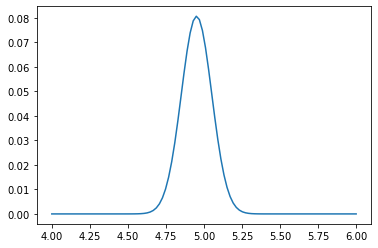

In [3]:
# Brute-force solution: explicitly compute the PDF for each sample, and multiply everything 
# (or take logs, add, and exponentiate):
likelihood = np.vectorize(lambda mu_hat: np.exp(np.log(norm.pdf(X, loc=mu_hat, scale=sigma)).sum()))
L_i = likelihood(mu_values)

plt.plot(mu_values, L_i / L_i.sum());

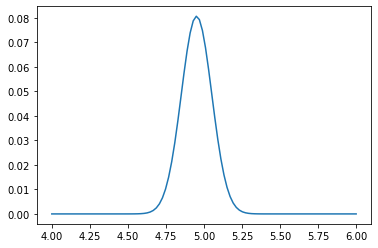

In [4]:
# Alternatively, use the analytic solution, \mathcal{L}_n(\mu) \sim N(\mu_hat, \sigma^2/n)

L_i2 = norm.pdf(mu_values, loc=mu_hat, scale=sigma/np.sqrt(n))

plt.plot(mu_values, L_i2 / L_i2.sum());

**(c)**

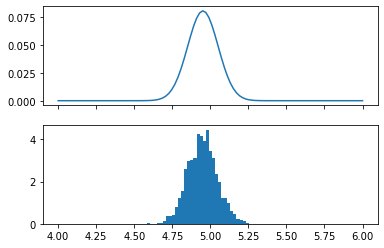

In [5]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col')
ax1.plot(mu_values, L_i2 / L_i2.sum())

posterior_samples = norm.rvs(loc=mu_hat, scale=sigma/np.sqrt(n), size=1000)
ax2.hist(posterior_samples, density=True, bins=mu_values);

**(d)**

Let $Y = e^X$.  Analytically:

- The CDF is $F_Y(z) = \mathbb{P}_\theta(e^X \leq z) = \mathbb{P}_\mu(X \leq \log z) = \mathbb{P}_\mu \left( \frac{X - \mu}{\sigma} \leq \frac{\log z - \mu}{\sigma} \right) = \mathbb{P}(Z \leq \log z - \mu) = \Phi(\log z - \mu)$, where $\Phi$ is the CDF of a standard normal distribution.
- The PDF is $f_Y(z) = F'_Y(z) = \partial \Phi(\log z - \mu) / \partial z = \phi(\log z - \mu) / z$, where $\phi = \Phi'$ is the PDF of a standard normal function.

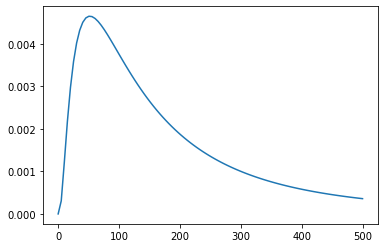

In [6]:
def posterior_density(z):
    # Suppress warnings about log(z) when z < 0 and division by zero 
    # np.where will filter out invalid values
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where(z > 0, norm.pdf(np.log(z) - mu_hat) / z, 0)
    
z_values = np.linspace(0, 500, 100)
f_values = posterior_density(z_values)

plt.plot(z_values, f_values);

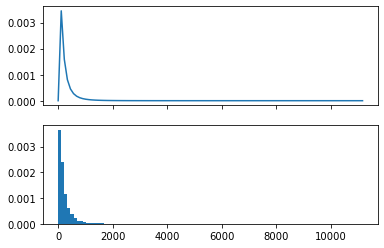

In [7]:
# By simulation:

# Resample from the estimated parametric distribution for X, and calculate Y = exp(X)
Y = np.exp(norm.rvs(loc=mu_hat, scale=sigma, size=10000))

# Recompute ranges for plot based on observed Y values
z_values = np.linspace(0, max(Y), 100)
f_values = posterior_density(z_values)

fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col')
ax1.plot(z_values, f_values)
ax2.hist(Y, density=True, bins=z_values);

**(e)**

Analytic solution:  $Y = g(X) = e^X$ and $X \sim N(\mu, 1)$.  Since $g$ is a monotonically increasing function, the quantiles of $Y$ are the exponentials of the quantiles of $X$; that is,

$$F_Y^{-1}(q) = g(F_X^{-1}(q)) = e^{F_X^{-1}(q)}$$

But $X$ follows a Normal distribution -- we can plug in the MLE for $\mu$, $\hat{\mu} = \overline{X}$, obtain the quantiles for $X$, and then obtain the quantiles for $Y$.

$$
\begin{align}
F_X^{-1}(q) &= \Phi^{-1}(q) / \sigma + \mu \\
F_Y^{-1}(q) &= e^{\Phi^{-1}(q) / \sigma + \mu}
\end{align}
$$

In [8]:
from scipy.stats import norm

z_025 = norm.ppf(0.025)
z_975 = norm.ppf(0.975)

posterior_interval_analytic = (np.exp(z_025 + mu_hat), np.exp(z_975 + mu_hat))
print("95%% posterior interval (analytic):  %.3f, %.3f" % posterior_interval_analytic)

95% posterior interval (analytic):  19.909, 1003.367


Alternatively, we can just sample from our simulation draws to get an approximation:

In [9]:
# Find percentile from simulated draws

posterior_interval_simulation = (
    np.quantile(Y, 0.025),
    np.quantile(Y, 0.975)
)

print("95%% posterior interval (simulation):  %.3f, %.3f" % posterior_interval_simulation)

95% posterior interval (simulation):  19.618, 973.991


**(f)**

For the Bayesian interval estimate, we need to find $C = (a, b)$ such that

$$ \int_{-\infty}^a f_Y(\theta | X^n) d\theta = \int_b^\infty f_Y(\theta | X^n) d\theta = \frac{\alpha}{2}$$

or, using the cumulative density functions,

$$ F_Y(a) = 1 - F_Y(b) = \frac{\alpha}{2}$$

$$\Phi(\log a - \mu) = 1 - \Phi(\log b - \mu) = \frac{\alpha}{2}$$

Solving for $a$ and $b$,

$$
a = e^{\mu + \Phi^{-1}(\alpha / 2)}
\quad \text{and} \quad
b = e^{\mu + \Phi^{-1}(1 - \alpha / 2)}
$$

This is exactly the same calculation as the analytic solution for the posterior interval.

In [10]:
from scipy.stats import norm

z_025 = norm.ppf(0.025)
z_975 = norm.ppf(0.975)

confidence_interval_analytic = (np.exp(z_025 + mu_hat), np.exp(z_975 + mu_hat))
print("95%% confidence interval (analytic):  %.3f, %.3f" % confidence_interval_analytic)

95% confidence interval (analytic):  19.909, 1003.367


**Exercise 12.11.3**.  Let $X_1, \dots, X_n \sim \text{Uniform}(0, \theta)$.  Let $f(\theta) \propto 1/\theta$.  Find the posterior density.

**Solution**.  The posterior density is proportional to the likelihood times the prior:

$$
\begin{align}
f(\theta | X^n) &\propto \mathcal{L}_n(\theta) f(\theta) \\
&= \frac{1}{\theta} \prod_{i=1}^n f(X_i; \theta)  \\
&= \frac{1}{\theta} \prod_{i=1}^n \frac{I(X_i \leq \theta)}{\theta} \\
&= \theta^{-(n+1)} I( \max \{ X_1, \dots, X_n \} \leq \theta \} ) \\
&= \begin{cases}
\theta^{-(n+1)} & \text{if } \theta \geq \max \{ X_1, \dots, X_n \} \\
0 & \text{otherwise}
\end{cases}
\end{align}
$$

Now we just need to normalize the posterior density so it integrates to 1.  Let $m = \max \{ X_1, \dots, X_n \}$.  Then:

$$ 1 = \int_{-\infty}^\infty f(\theta) d\theta  = \int_m^\infty c \theta^{-(n+1)} d\theta = c m^{-n} / n$$

Solving this we get $c = n m^n$, so the posterior density is:

$$
f(\theta) = \begin{cases}
\frac{n}{\theta} \left(\frac{m}{\theta}\right)^n & \text{if } \theta \geq m \\
0 & \text{otherwise}
\end{cases}
$$

where $m = \max \{ X_1, \dots, X_n \}$.

**Exercise 12.11.4**.  Suppose that 50 people are given a placebo and 50 are given a new treatment.  30 placebo patients show improvement while 40 treated patients show improvement.  Let $\tau = p_2 - p_1$ where $p_2$ is the probability of improving under treatment and $p_1$ is the probability of improving under placebo.

**(a)** Find the MLE of $\tau$.  Find the standard error and 90% confidence interval using the delta method.

**(b)** Find the standard error and 90% confidence interval using the parametric bootstrap.

**(c)** Use the prior $f(p_1, p_2) = 1$.  Use simulation to find the posterior mean and posterior 90% interval for $\tau$.

**(d)** Let

$$ \psi = \log \left( \left( \frac{p_1}{1 - p_1} \div \frac{p2}{1 - p2} \right) \right) $$

be the log-odds ratio.  Note that $\psi = 0$  if $p_1 = p_2$.  Find the MLE of $\psi$.  Use the delta method to find a 90% confidence interval for $\psi$.

**(e)** Use simulation to find the posterior mean and posterior 90% interval for $\psi$.

**Solution**.

**(a)**

We have two random variables, $X_1 \sim \text{Binomial}(n_1, p_1)$ and $X_2 \sim \text{Binomial}(n_2, p_2)$.  We are given $n_1 = n_2 = 50$, and the measurements $X_1 = 30$ and $X_2 = 40$.

We wish to estimate $\tau = g(p_1, p_2) = p_2 - p_1$.  The MLE is simply $\hat{\tau} = g(\hat{p}_1, \hat{p}_2) = \hat{p}_2 - \hat{p}_1 = X_2 / n_2 - X_1 / n_1$.  

Using the multiparameter delta method, the gradient of $g$ is

$$ \nabla g = 
\begin{pmatrix} \partial g / \partial p_1 \\ \partial g / \partial p_2 \end{pmatrix} 
= \begin{pmatrix} -1 \\ 1 \end{pmatrix} 
$$

The log likelihood is:

$$ 
\begin{align}
\ell(p_1, p_2) &= \log f_{X_1}(X_1; p_1) + \log f_{X_2}(X_2; p_2) \\
& = \log \binom{n_1}{X_1} p_1^{X_1} (1 - p_1)^{n_1 - X_1}
+ \log \binom{n_2}{X_2} p_2^{X_2} (1 - p_2)^{n_2 - X_2} \\
&= \log \binom{n_1}{X_1} + X_1 \log p_1 + (n_1 - X_1) \log (1 - p_1)
+ \log \binom{n_2}{X_2} + X_2 \log p_2 + (n_2 - X_2) \log (1 - p_2) \\
&= X_1 \log p_1 + (n_1 - X_1) \log (1 - p_1) + X_2 \log p_2 + (n_2 - X_2) \log (1 - p_2) + C
\end{align}
$$

where $C$ does not depend on $p_1$ or $p_2$.

The partial derivatives of the log likelihood are:

$$
\begin{align}
\frac{\partial^2 \ell}{\partial p_1^2} & = - \frac{X_1}{p_1^2} - \frac{n_1 - X_1}{(1 - p_1)^2} \\
\frac{\partial^2 \ell}{\partial p_2^2} & = - \frac{X_2}{p_2^2} - \frac{n_2 - X_2}{(1 - p_2)^2} \\
\frac{\partial^2 \ell}{\partial p_1 \partial p_2} & = 0
\end{align}
$$

The Fisher Information Matrix is

$$ I_n(p_1, p_2) = -\begin{pmatrix}
\mathbb{E}\left[ \frac{\partial^2 \ell}{\partial p_1^2} \right]
& \mathbb{E}\left[ \frac{\partial^2 \ell}{\partial p_1 \partial p_2} \right]  \\
\mathbb{E}\left[ \frac{\partial^2 \ell}{\partial p_1 \partial p_2} \right]
& \mathbb{E}\left[ \frac{\partial^2 \ell}{\partial p_2^2} \right]
\end{pmatrix} = \begin{pmatrix}
\frac{n_1}{p_1(1 - p_1)} & 0 \\
0 & \frac{n_2}{p_2(1 - p_2)}
\end{pmatrix}$$

and its inverse is 

$$J_n(p_1, p_2) = I_n^{-1}(p_1, p_2) = \begin{pmatrix} 
\frac{p_1(1 - p_1)}{n_1} & 0 \\
0 & \frac{p_2(1 - p_2)}{n_2}
\end{pmatrix}$$

Then,

$$\hat{\text{se}}(\hat{\tau}) = \sqrt{(\hat{\nabla}g)^T \hat{J}_n (\hat{\nabla}g)}
= \sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}
$$

And we get the confidence interval:

$$ \hat{\tau} \pm z_{1 - \alpha/2}\hat{\text{se}}(\hat{\tau})$$

In [35]:
import numpy as np
from scipy.stats import norm

n1 = 50
n2 = 50

X1 = 30
X2 = 40

p1_hat = X1 / n1
p2_hat = X2 / n2

tau_hat = p2_hat - p1_hat
se_hat = np.sqrt((p1_hat * (1 - p1_hat) / n1) + (p2_hat * (1 - p2_hat) / n2))

z_90 = norm.ppf(0.95)

confidence_interval = (tau_hat - z_90 * se_hat, tau_hat + z_90 * se_hat)

print('Estimated difference of means: \t\t %.3f' % tau_hat)
print('Estimated 90%% confidence interval:\t %.3f, %.3f' % confidence_interval)

Estimated difference of means: 		 0.200
Estimated 90% confidence interval:	 0.053, 0.347


**(b)**

In [33]:
import numpy as np
from scipy.stats import binom

B = 100000

n1 = 50
n2 = 50

X1 = 30
X2 = 40

p1_hat = X1 / n1
p2_hat = X2 / n2

XX1 = binom.rvs(n1, p1_hat, size=B)
XX2 = binom.rvs(n2, p2_hat, size=B)
tau_boot = XX2 / n2 - XX1 / n1

tau_boot_hat = tau_boot.mean()
q_05 = np.quantile(tau_boot, 0.05)
q_95 = np.quantile(tau_boot, 0.95)

boot_confidence_interval = (q_05, q_95)

print('Estimated difference of means: \t\t %.3f' % tau_boot_hat)
print('Estimated 90%% confidence interval:\t %.3f, %.3f' % boot_confidence_interval)

Estimated difference of means: 		 0.200
Estimated 90% confidence interval:	 0.060, 0.340


**(c)**  The posterior density is proportional to the likelihood times the prior:

$$
\begin{align}
f((p_1, p_2) | X^2) &\propto \mathcal{L}(p_1, p_2 | X^2) f(p_1, p_2) \\
&= f_{X_1}(X_1 | p_1) f_{X_2}(X_2 | p_1) \cdot 1 \\
&= \binom{n_1}{X_1} p_1^{X_1} (1 - p_1)^{n_1 - X_1} \binom{n_2}{X_2} p_2^{X_2} (1 - p_2)^{n_2 - X_2} \\
&\propto p_1^{X_1} (1 - p_1)^{n_1 - X_1} p_2^{X_2} (1 - p_2)^{n_2 - X_2} \\
&\propto f(p_1 | X_1) f(p_2 | X_2)
\end{align}
$$

where 

$$p_1 | X_1 \sim \text{Beta}(X_1 + 1, n_1 - X_1 + 1) 
\quad \text{and} \quad
p_2 | X_2 \sim \text{Beta}(X_2 + 1, n_2 - X_2 + 1)$$

We can now sample from the Beta distributions to sample $p_1$, $p_2$, and for each pair of samples, compute the sample $\tau = p_2 - p_1$.

In [38]:
from scipy.stats import beta

B = 100000

n1 = 50
n2 = 50

X1 = 30
X2 = 40

p1_boot = beta.rvs(X1 + 1, n1 - X1 + 1, size=B)
p2_boot = beta.rvs(X2 + 1, n2 - X2 + 1, size=B)
tau_boot = p2_boot - p1_boot

tau_boot_hat = tau_boot.mean()
q_05 = np.quantile(tau_boot, 0.05)
q_95 = np.quantile(tau_boot, 0.95)

boot_confidence_interval = (q_05, q_95)

print('Estimated posterior mean: \t\t %.3f' % tau_boot_hat)
print('Estimated 90%% confidence interval:\t %.3f, %.3f' % boot_confidence_interval)

Estimated posterior mean: 		 0.193
Estimated 90% confidence interval:	 0.047, 0.336


**(d)**

Let $\psi = h(p_1, p_2) = \log p_1 - \log (1 - p_1) - \log p_2 + \log (1 - p_2)$.  The MLE is just $\hat{\psi} = h(\hat{p_1}, \hat{p_2})$.

Using the multiparameter delta method, the gradient of $h$ is:

$$\nabla h = 
\begin{pmatrix}
\frac{\partial h}{\partial p_1} \\ 
\frac{\partial h}{\partial p_2} \end{pmatrix}
= \begin{pmatrix}
\frac{1}{p_1(1 - p_1)} \\
-\frac{1}{p_2(1 - p_2)}
\end{pmatrix}
$$

The inverse Fisher Information Matrix is still:

$$J_n(p_1, p_2) = \begin{pmatrix}
\frac{p_1(1 - p_1)}{n_1} & 0 \\
0 & \frac{p_2(1 - p_2)}{n_2}
\end{pmatrix}$$

and so the estimated standard error is:

$$
\begin{align}
\hat{\text{se}}(\hat{\psi}) &= \sqrt{(\hat{\nabla}h)^T \hat{J}_n (\hat{\nabla}h)} \\
&= 
\sqrt{\begin{pmatrix}
\frac{1}{\hat{p}_1(1 - \hat{p}_1)} &
-\frac{1}{\hat{p}_2(1 - \hat{p}_2)}
\end{pmatrix}
\begin{pmatrix}
\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} & 0 \\
0 & \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}
\end{pmatrix}
\begin{pmatrix}
\frac{1}{\hat{p}_1(1 - \hat{p}_1)} \\
-\frac{1}{\hat{p}_2(1 - \hat{p}_2)}
\end{pmatrix}} \\
&= \sqrt{\frac{1}{n_1 \hat{p}_1(1 - \hat{p}_1)} + \frac{1}{n_2 \hat{p}_2(1 - \hat{p}_2)}}
\end{align}
$$

and we get the confidence interval:

$$\hat{\psi} \pm z_{1 - \alpha/2} \hat{\text{se}}(\hat{\psi})$$

In [41]:
import numpy as np
from scipy.stats import norm

n1 = 50
n2 = 50

X1 = 30
X2 = 40

p1_hat = X1 / n1
p2_hat = X2 / n2

psi_hat = np.log((p1_hat / (1 - p1_hat)) / (p2_hat / (1 - p2_hat)))
se_hat = np.sqrt(1/(n1 * p1_hat * (1 - p1_hat)) + 1/(n2 * p2_hat * (1 - p2_hat)))

z_90 = norm.ppf(0.95)

confidence_interval = (psi_hat - z_90 * se_hat, psi_hat + z_90 * se_hat)

print('Estimated log-odds ratio: \t\t %.3f' % psi_hat)
print('Estimated 90%% confidence interval:\t %.3f, %.3f' % confidence_interval)

Estimated log-odds ratio: 		 -0.981
Estimated 90% confidence interval:	 -1.732, -0.230


**(e)**  The probability distributions for $p_1 | X_1$ and $p_2 | X_2$ are still the same -- we are just computing $\psi = h(p_1, p_2)$ for each simulation sample now, rather than $\tau = g(p_1, p_2)$.

In [42]:
from scipy.stats import beta

B = 100000

n1 = 50
n2 = 50

X1 = 30
X2 = 40

p1_boot = beta.rvs(X1 + 1, n1 - X1 + 1, size=B)
p2_boot = beta.rvs(X2 + 1, n2 - X2 + 1, size=B)
psi_boot = np.log((p1_boot / (1 - p1_boot)) / (p2_boot / (1 - p2_boot)))

psi_boot_hat = psi_boot.mean()
q_05 = np.quantile(psi_boot, 0.05)
q_95 = np.quantile(psi_boot, 0.95)

boot_confidence_interval = (q_05, q_95)

print('Estimated posterior mean: \t\t %.3f' % psi_boot_hat)
print('Estimated 90%% confidence interval:\t %.3f, %.3f' % boot_confidence_interval)

Estimated posterior mean: 		 -0.950
Estimated 90% confidence interval:	 -1.696, -0.223
